<center><span style="font-family:Comic Sans MS; color:navy "><h1>House Pricee:Advanced Regression Techniques</h1></span></center>

# <b>1 <span style='color:#94D4F6'>|</span> About DataSet</b>

<span style='font-family:comic Sans MS; color:navy'> Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.</span>
<center> 
<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png", width="400",  height="300"/>
</center> 

# <b>2 <span style='color:#94D4F6'>|</span> Define the Problem</b>
<span style='font-family:comic Sans MS; color:navy'>With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.</span>

# <b>3 <span style='color:#94D4F6'>|</span> Import Libraries</b>

In [81]:
import numpy as np #linear algebra
import pandas as pd # data processing

#for graphs, visuals, etc.
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

#Configure Visualization Defaults
# %matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
plt.style.use('ggplot')
sns.set_style('white')

import cufflinks as cf
cf.go_offline()

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# outliers
from collections import Counter  ## used in droping outliers
# encoding categorical features
from sklearn.preprocessing import(
    StandardScaler,# standard scalar will scale data from (-3 to 3)
    LabelEncoder, # for label encoding categorical features
    OneHotEncoder, # used for onehot encoding categorical features
) 
# ML models
from sklearn.svm import SVR
from sklearn.model_selection import(
    train_test_split,# used to split the data into training and testing
    RandomizedSearchCV,# used for tuning the models parameters
    cross_val_score,
    
    
    
)
from scipy.stats import(
    uniform,
    randint,
    )
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso
)
# for printing a table
from prettytable import(
 PrettyTable,
 ALL,
 FRAME,
    )
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error


/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# <b>4 <span style='color:#94D4F6'>|</span> Import Data</b>

In [48]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# <b>5 <span style='color:#94D4F6'>|</span> PreProcessing</b>
<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>5.1 |</span></b> How data Look! </b></p></div>

In [49]:
# train Data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [50]:
# test Data
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<span style='font-family:comic Sans MS; color:navy'> Skip of Price which we will predict,all data is the same and we should do preProcessing on both of(df and df_test)</span>

<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>5.2 |</span></b> Data Information </b></p></div>

In [51]:
## shape of the training dataset
print('shape of the training dataset:')
print('There are {} rows and {} columns in train dataset.'.format(df.shape[0],df.shape[1]))

shape of the training dataset:
There are 1460 rows and 81 columns in train dataset.


In [52]:
# Data Columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<span style='font-family:comic Sans MS; color:navy'>We have 80 Coulmns in our dataSet</span>

In [53]:
# DataFrame Informatin
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<span style='font-family:comic Sans MS; color:navy'>In this dataset, we have columns with categorical data and empty data, which we need to modify to predict and train the data.</span>

In [54]:
df.describe().style.background_gradient(cmap ='summer')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<span style='font-family:comic Sans MS; color:navy'>Although we don't have only numerical columns, we can get some mathematical specifications from the table below</span>

In [55]:
print('Number of numerical columns:',df.mean(numeric_only=True).count())
df.mean(numeric_only=True)# mean of numerical columns

Number of numerical columns: 38


Id                  730.500000
MSSubClass           56.897260
LotFrontage          70.049958
LotArea           10516.828082
OverallQual           6.099315
OverallCond           5.575342
YearBuilt          1971.267808
YearRemodAdd       1984.865753
MasVnrArea          103.685262
BsmtFinSF1          443.639726
BsmtFinSF2           46.549315
BsmtUnfSF           567.240411
TotalBsmtSF        1057.429452
1stFlrSF           1162.626712
2ndFlrSF            346.992466
LowQualFinSF          5.844521
GrLivArea          1515.463699
BsmtFullBath          0.425342
BsmtHalfBath          0.057534
FullBath              1.565068
HalfBath              0.382877
BedroomAbvGr          2.866438
KitchenAbvGr          1.046575
TotRmsAbvGrd          6.517808
Fireplaces            0.613014
GarageYrBlt        1978.506164
GarageCars            1.767123
GarageArea          472.980137
WoodDeckSF           94.244521
OpenPorchSF          46.660274
EnclosedPorch        21.954110
3SsnPorch             3.409589
ScreenPo

# <b>6 <span style='color:#94D4F6'>|</span> Featur Engineering</b>

<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>6.1 |</span></b> Taking care of missing data </b></p></div>

In [56]:
# cols names which contains missing values
df.columns[df.isnull().sum() > 0]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

<span style='font-family:comic Sans MS; color:navy'>We have Null data in 19 columns</span>

<AxesSubplot:>

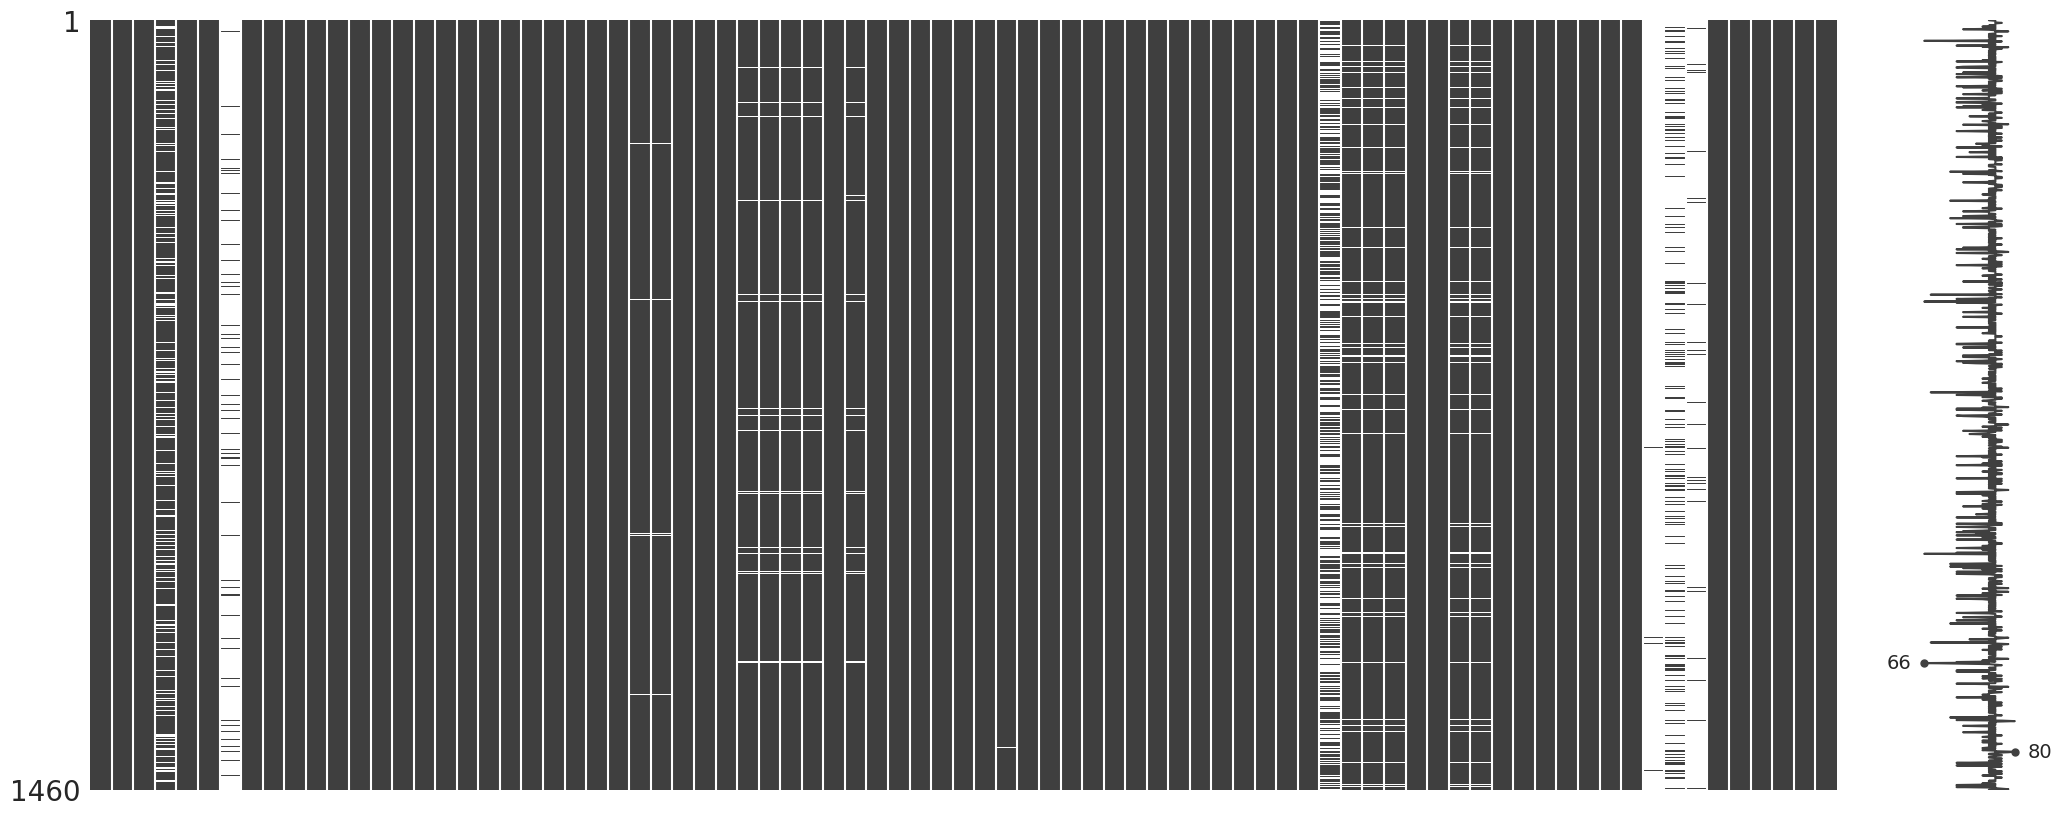

In [57]:
# Show missing Value
msno.matrix(df)

<span style='font-family:comic Sans MS; color:navy'>missing values in each columns will be presented by white lines</span>


In [58]:
# Fill missing value by previous value
df.fillna(method='bfill',inplace=True)
# Or we can fill missing value by next value
df.fillna(method='ffill',inplace = True)

<span style='font-family:comic Sans MS; color:navy'>We have two Option for fill the missing value one fill by befor value other fill by next value</span>

<AxesSubplot:>

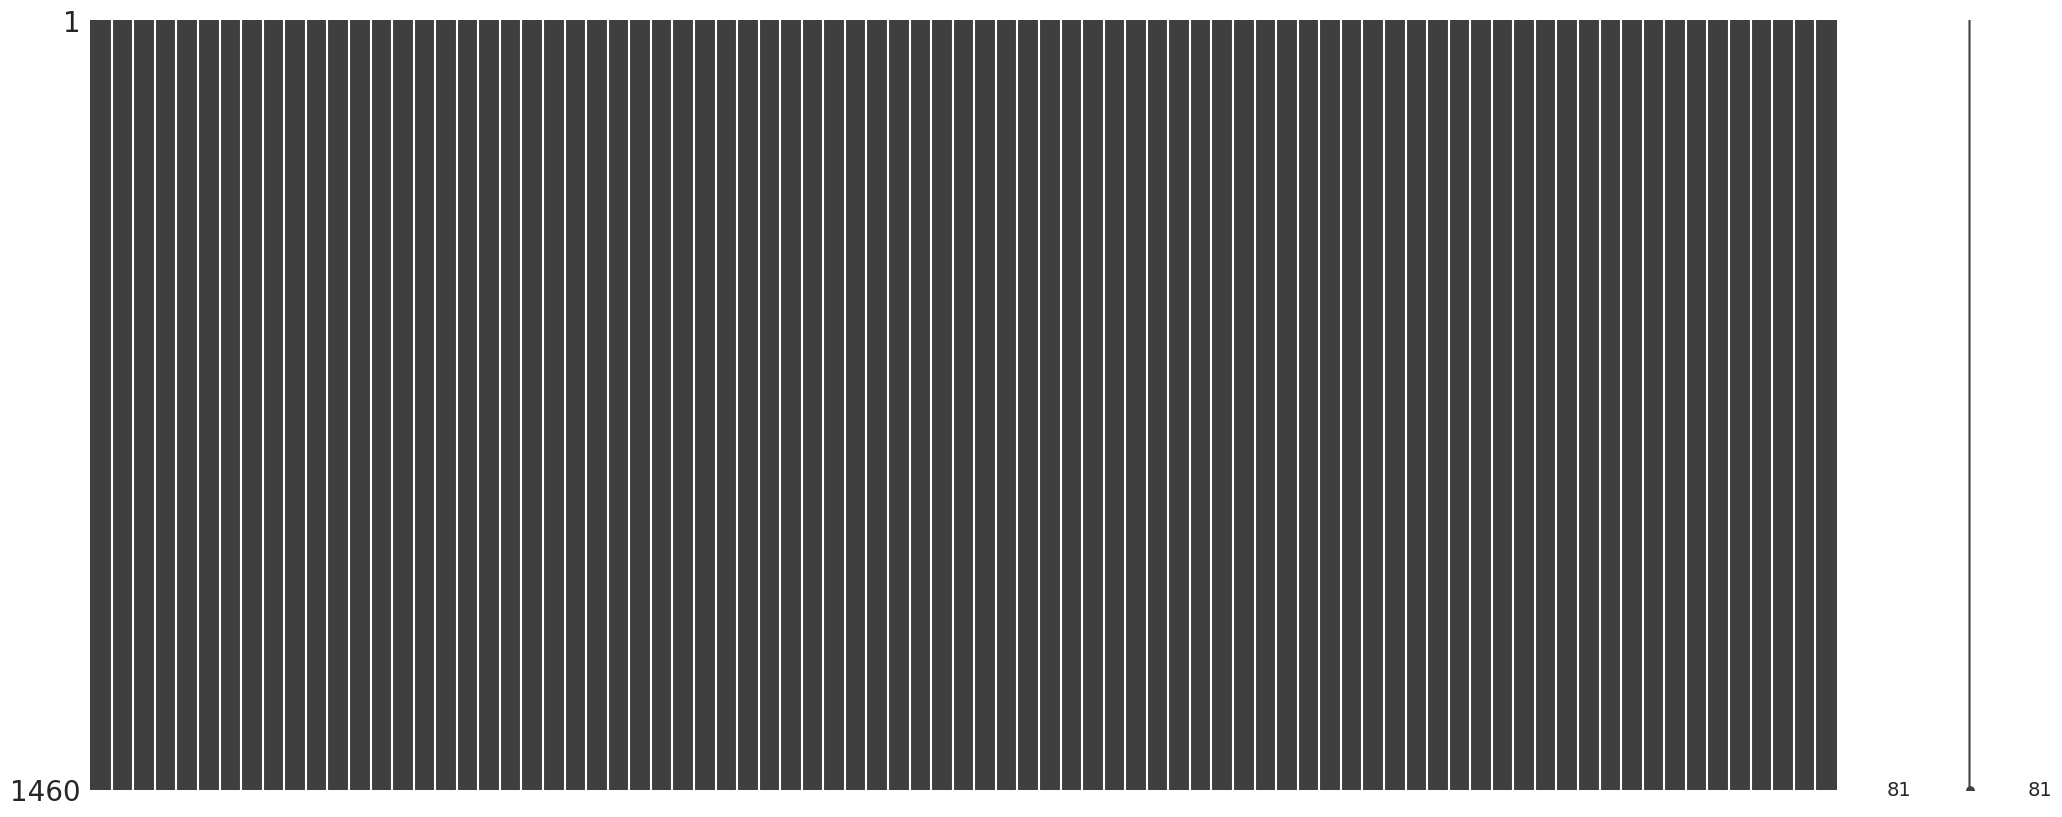

In [59]:
msno.matrix(df)

<span style='font-family:comic Sans MS; color:navy'>As you can see, we don't have any missing value now in our dataSet</span>

In [60]:
## cols names which contains missing values
df.columns[df.isnull().sum() > 0]

Index([], dtype='object')

<span style='font-family:comic Sans MS; color:navy'>As you can see,by this commend we don't have Null data</span>

<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>6.2 |</span></b> Drop duplicate data </b></p></div>

In [61]:
## shows number of duplicated values in the dataset
print('Number of duplicated values in dataset: ', df.duplicated().sum())

Number of duplicated values in dataset:  0


<span style='font-family:comic Sans MS; color:navy'>As you can see,we don't have duplicate data in our dataSet</span>

<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>6.3 |</span></b> Drop outliers in the data </b></p></div>

In [62]:
numeric_columns = [x for i,x in enumerate(df.select_dtypes(include=np.number).columns.tolist())
                   if(x!='SalePrice')] 
numeric_columns

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [63]:
def IQR_method (df,n,features):
    outlier_list = []
    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers
        outlier_list.extend(outlier_list_column)
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n)
    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
        
        
    return multiple_outliers
        
                    


In [64]:
## drop outliers using IQR_method
Outliers_IQR = IQR_method(df,1,numeric_columns)
# print(Outliers_IQR)
df = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 0


<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>6.4 |</span></b> Feature selection </b></p></div>


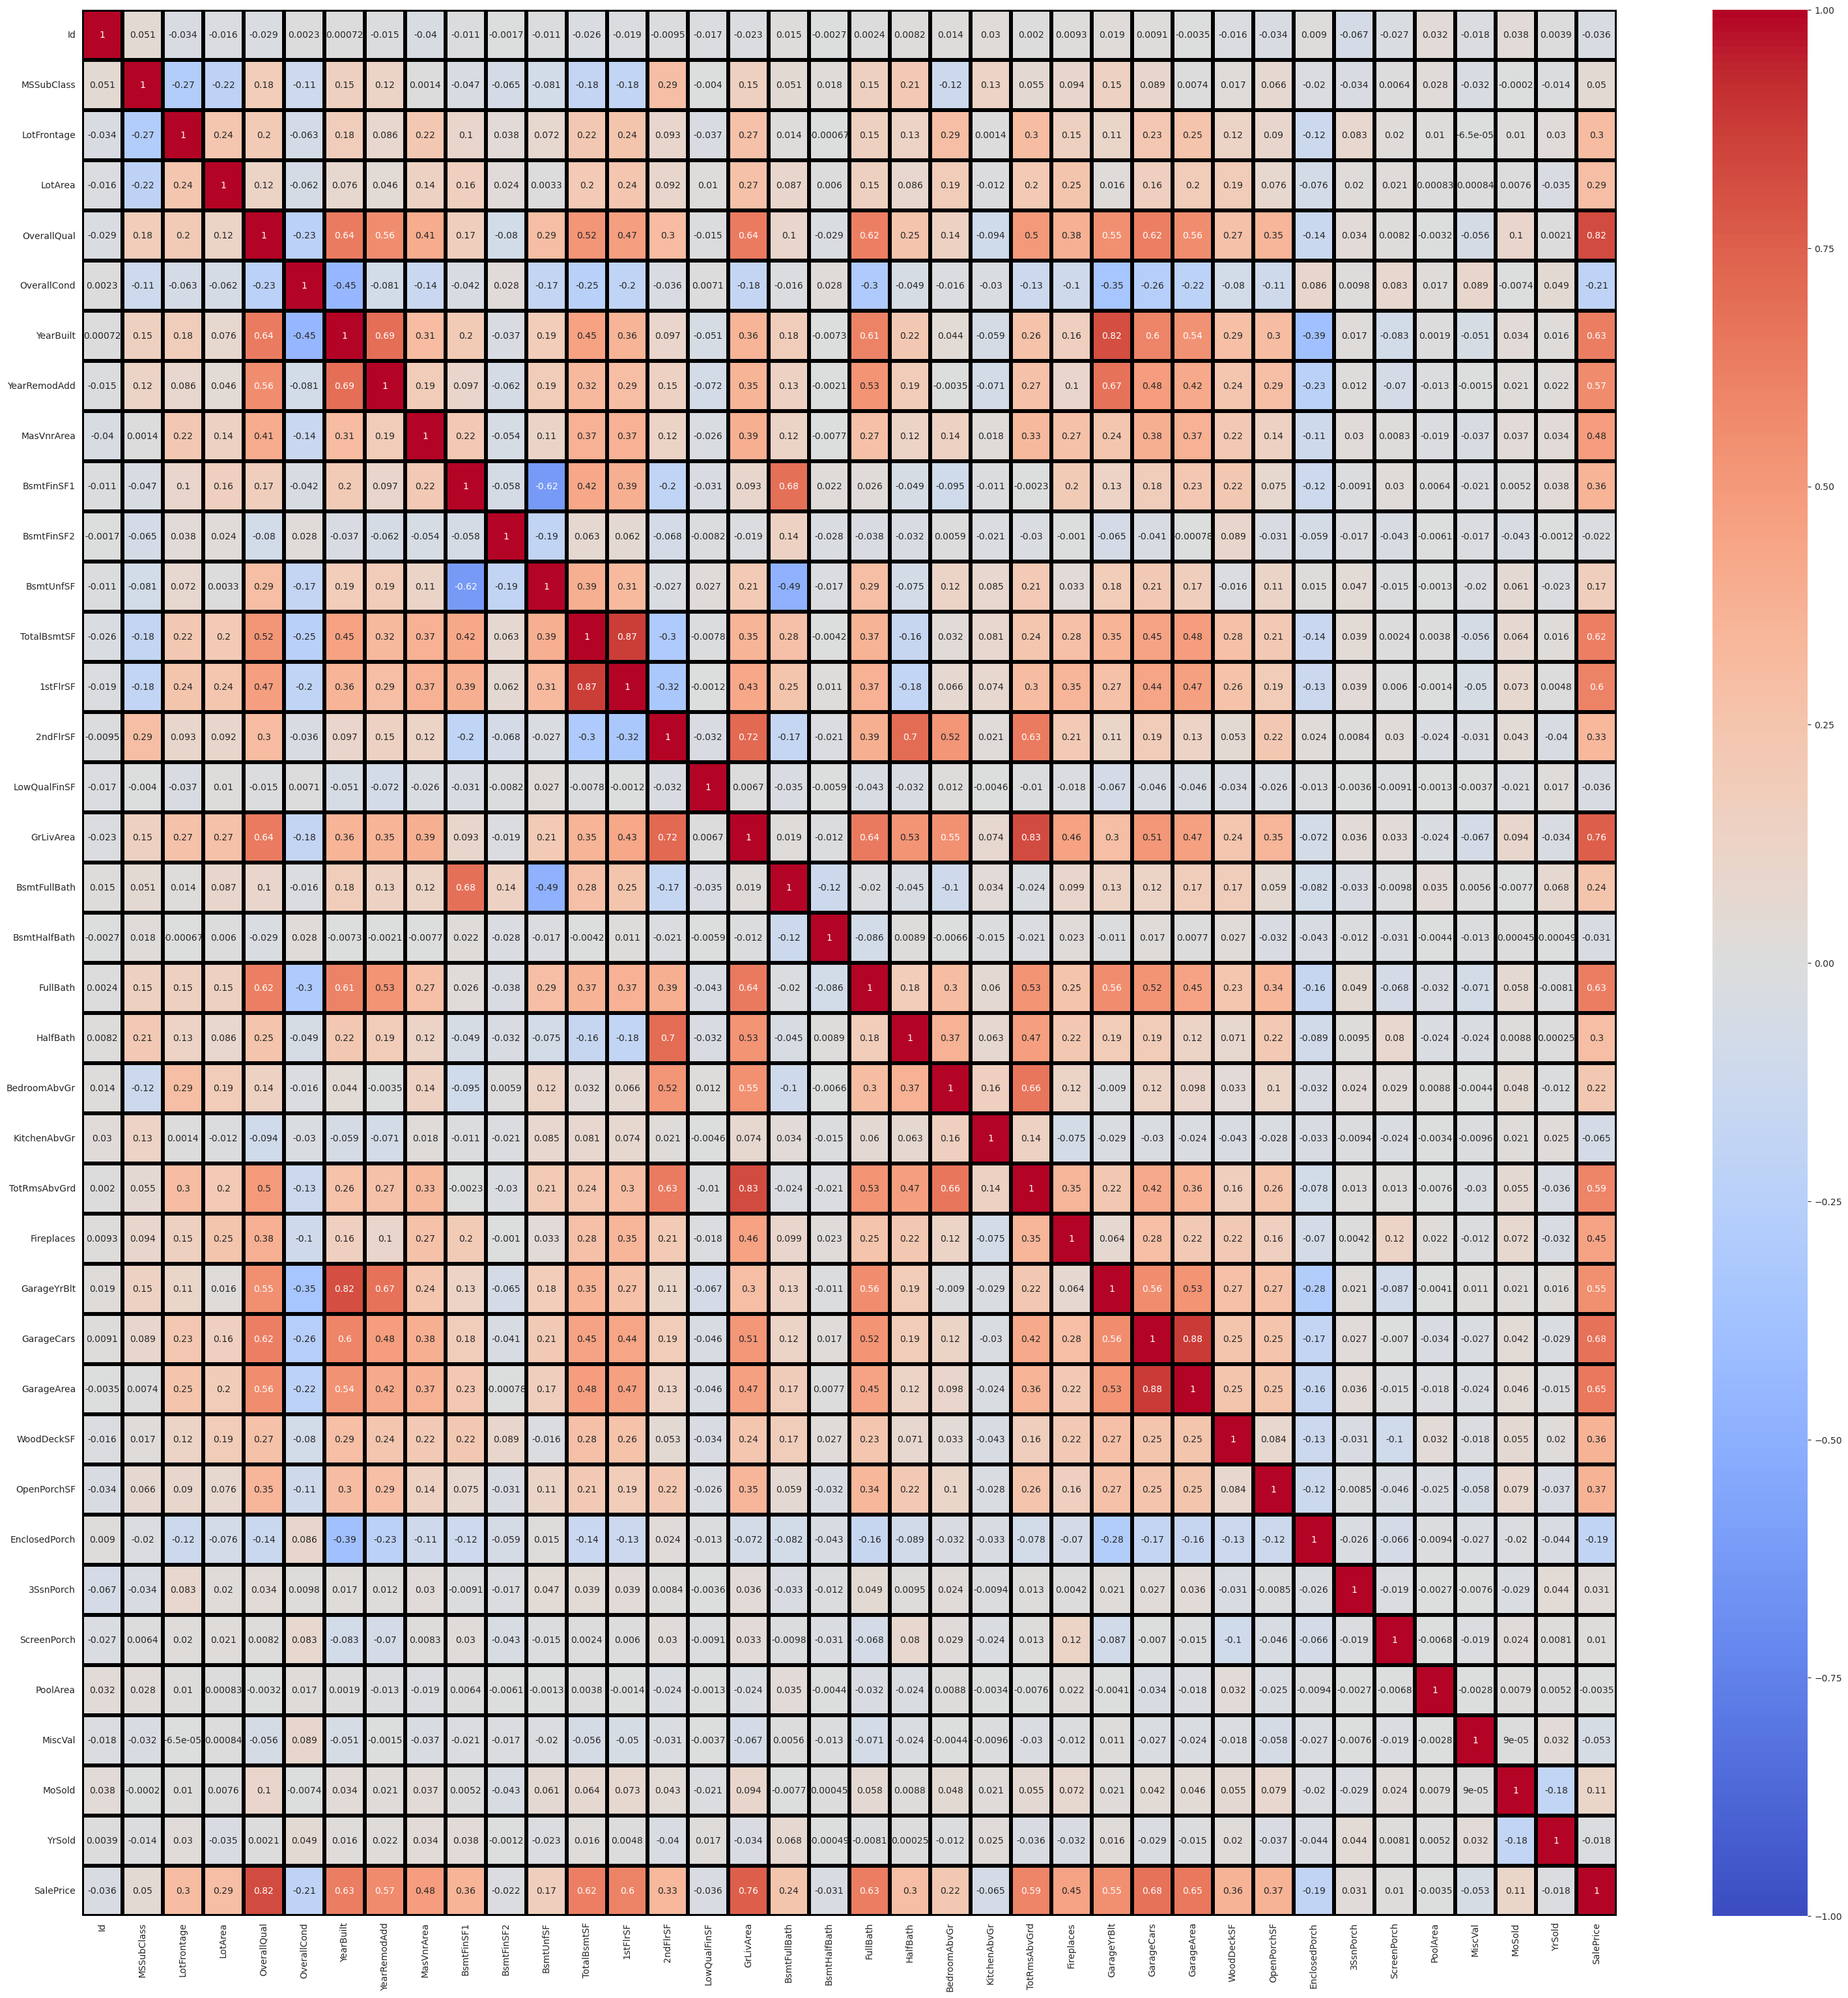

In [65]:
# correlation matrix between numerical cols in the dataset.
fig, ax = plt.subplots(figsize=(38,38))
coer = df.corr()
sns.heatmap(coer, annot = True, ax=ax, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')
plt.show()

<span style='font-family:comic Sans MS; color:navy'>As you can see, we have some unnecessary columns which we didn't need for Price Prediction or maybe have a weak correlation.</span>

In [66]:
col_drops = ['Id', 'MSSubClass', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath',
             'KitchenAbvGr', '3SsnPorch', 'MiscVal', 'ScreenPorch', 'PoolArea','YrSold'] ## cols to drop 
df.drop(col_drops,axis=1,inplace=True)

<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>6.5 |</span></b> Label encoding of categorical data </b></p></div>


In [67]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = set(df.columns).difference(set(numeric_cols))   
print(categorical_cols)

{'BsmtFinType2', 'HouseStyle', 'MasVnrType', 'Neighborhood', 'Condition1', 'Exterior1st', 'FireplaceQu', 'SaleType', 'GarageCond', 'GarageQual', 'RoofMatl', 'RoofStyle', 'HeatingQC', 'SaleCondition', 'Alley', 'PoolQC', 'Heating', 'Utilities', 'LandContour', 'BsmtFinType1', 'Exterior2nd', 'GarageType', 'LotConfig', 'LotShape', 'Condition2', 'MiscFeature', 'BsmtExposure', 'Electrical', 'KitchenQual', 'LandSlope', 'Functional', 'MSZoning', 'ExterCond', 'BldgType', 'CentralAir', 'PavedDrive', 'ExterQual', 'BsmtQual', 'Fence', 'BsmtCond', 'GarageFinish', 'Street', 'Foundation'}


<span style='font-family:comic Sans MS; color:navy'>As you can see, here we have some categorical columns now we want to change them to predict.</span>

In [68]:
## print all unique values in categorical columns
for i, x in enumerate(categorical_cols):  
    print(x, df[x].unique())

BsmtFinType2 ['Unf' 'LwQ' 'BLQ' 'GLQ' 'ALQ' 'Rec']
HouseStyle ['2Story' '1Story' '1.5Unf' 'SFoyer' '1.5Fin' 'SLvl' '2.5Unf']
MasVnrType ['BrkFace' 'None' 'Stone' 'BrkCmn']
Neighborhood ['CollgCr' 'Crawfor' 'NoRidge' 'Somerst' 'Sawyer' 'NridgHt' 'BrkSide'
 'NAmes' 'SawyerW' 'IDOTRR' 'MeadowV' 'Mitchel' 'Gilbert' 'OldTown'
 'ClearCr' 'Edwards' 'NWAmes' 'NPkVill' 'Timber' 'Veenker' 'Blmngtn'
 'StoneBr' 'SWISU']
Condition1 ['Norm' 'RRAe' 'Feedr' 'RRNn' 'RRAn' 'Artery' 'PosN' 'RRNe' 'PosA']
Exterior1st ['VinylSd' 'Wd Sdng' 'HdBoard' 'WdShing' 'BrkFace' 'CemntBd' 'MetalSd'
 'Stucco' 'Plywood' 'AsbShng' 'BrkComm' 'ImStucc']
FireplaceQu ['TA' 'Gd' 'Ex' 'Fa' 'Po']
SaleType ['WD' 'New' 'COD' 'ConLI' 'ConLw' 'Con' 'ConLD' 'CWD' 'Oth']
GarageCond ['TA' 'Fa' 'Gd' 'Ex' 'Po']
GarageQual ['TA' 'Fa' 'Ex' 'Gd' 'Po']
RoofMatl ['CompShg' 'Tar&Grv' 'WdShngl' 'WdShake']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat']
HeatingQC ['Ex' 'Gd' 'TA' 'Fa' 'Po']
SaleCondition ['Normal' 'Abnorml' 'Partial' 'Fami

<span style='font-family:comic Sans MS; color:navy'>Below we have some columns with their Unique data which come to dataSet ones</span>

In [69]:
## drop this col since it has one value
df.drop(['Utilities'],axis=1,inplace=True)

<span style='font-family:comic Sans MS; color:navy'>here we delete the data come ones</span>

In [70]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = set(df.columns).difference(set(numeric_cols)) 

In [71]:
## names of columns that will label encoded
lecols = []  
for x in categorical_cols:
    lecols.append(x)
le = LabelEncoder() #imported
df[lecols] = df[lecols].apply(le.fit_transform) #fit data
df.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition,SalePrice
0,3,65.0,8450,1,0,3,3,4,0,3,...,0,61,0,0,2,2,2,8,4,208500
1,3,68.0,11250,1,0,0,3,4,0,3,...,0,42,0,0,2,2,9,8,4,223500
2,3,60.0,9550,1,0,0,3,0,0,4,...,0,35,272,0,2,2,2,8,0,140000
3,3,84.0,14260,1,0,0,3,2,0,13,...,192,84,0,0,2,2,12,8,4,250000
4,3,75.0,10084,1,0,3,3,4,0,19,...,255,57,0,0,1,2,8,8,4,307000


<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>6.6 |</span></b> Feature Scaling </b></p></div>


In [72]:
# scalar for all numerical columns excluding target column
sc_X = StandardScaler()
# scalar for the target column
sc_y = StandardScaler()
# list of col  names that include numerical values
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
# list of all numeric cols excluding the target col
numeric_cols_x = [x for i,x in enumerate(numeric_cols) if(x!='SalePrice')]
# list includes target col name
numeric_cols_y = [x for i,x in enumerate(numeric_cols) if(x not in numeric_cols_x)]
df[numeric_cols_x] = sc_X.fit_transform(df[numeric_cols_x])
df[numeric_cols_y]= sc_y.fit_transform(df[numeric_cols_y])
df.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition,SalePrice
0,0.0,-0.283307,-0.248908,0.054206,-0.931994,0.771030,0.300497,0.595021,-0.205074,-1.194726,...,-0.814674,0.364685,-0.301381,-1.835045,0.607291,0.111515,-1.582219,0.313487,0.185320,0.455838
1,0.0,-0.119158,0.290140,0.054206,-0.931994,-1.334396,0.300497,0.595021,-0.205074,-1.194726,...,-0.814674,-0.000507,-0.301381,-1.835045,0.607291,0.111515,0.987767,0.313487,0.185320,0.682924
2,0.0,-0.556888,-0.037139,0.054206,-0.931994,-1.334396,0.300497,-1.899560,-0.205074,-1.027595,...,-0.814674,-0.135051,5.245273,-1.835045,0.607291,0.111515,-1.582219,0.313487,-3.535611,-0.581186
3,0.0,0.756303,0.869617,0.054206,-0.931994,-1.334396,0.300497,-0.652269,-0.205074,0.476585,...,0.930417,0.806759,-0.301381,-1.835045,0.607291,0.111515,2.089189,0.313487,0.185320,1.084109
4,0.0,0.263857,0.065665,0.054206,-0.931994,0.771030,0.300497,0.595021,-0.205074,1.479371,...,1.503025,0.287802,-0.301381,-1.835045,-0.577216,0.111515,0.620626,0.313487,0.185320,1.947034


<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>6.7 |</span></b> Define the independent and dependent variables </b></p></div>

In [73]:
X = df.iloc[:, :-1].values ## independent variables
y = df.iloc[:, -1].values  ## dependent variables

<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>6.8 |</span></b> Splitting the dataset into training and testing </b></p></div>

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


<span style='font-family:comic Sans MS; color:navy'>splitting the dataset into 80% training and 20% testing</span>

# <b>7 <span style='color:#94D4F6'>|</span>The machine learning models</b>

<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>7.1 |</span></b> Initial models test </b></p></div>

In [75]:
init_models = {
    'support vector linear' : SVR(kernel='linear'),
    'support vector kernel' : SVR(kernel= 'rbf'),
    'XGBOOST':XGBRegressor(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'LGBM' : LGBMRegressor()
}
R2 = []
models_names = []
for i,(key,model) in enumerate(init_models.items()):
    model.fit(X_train,y_train)
    models_names.append(key)
    R2.append(np.mean(cross_val_score(model,X_train,y_train,cv=5)))
models_scores = pd.DataFrame({'model name':models_names,'R2 score':R2})
models_scores.head(7)

,model name,R2 score
0,support vector linear,0.893928
1,support vector kernel,0.854803
2,XGBOOST,0.881831
3,Decision Tree,0.768962
4,Random Forest,0.885020
5,LGBM,0.903859


- **<mark style="background-color:#D1D96A;color:black;border-radius:5px;opacity:0.7">  plot cross validation R2 scores for the models   </mark>**

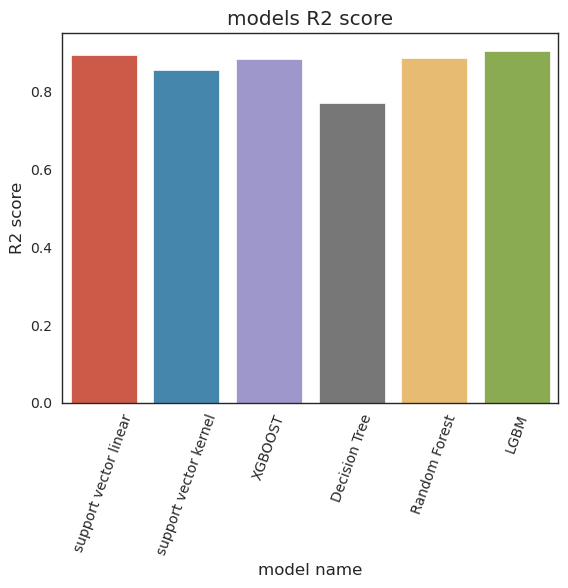

In [76]:
fig, ax = plt.subplots()
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
ax.set_title("models R2 score")
sns.barplot(data=models_scores, x='model name', y="R2 score")
plt.show()


<span style='font-family:comic Sans MS; color:navy'>As you can see, the LGBM model is the best and we use it for our final prediction and submission.</span>

<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>7.2 |</span></b> Tuning the parameters of promising models </b></p></div>

<span style='font-family:comic Sans MS; color:navy'>In the below, we have some model which was better for prediction,  we should try to make them better and choose one of them.</span>

- **<mark style="background-color:#D1D96A;color:black;border-radius:5px;opacity:0.7">Random Forest </mark>**

In [77]:
rf = RandomForestRegressor(random_state=0,n_estimators=10)
param_grid = {
    'max_features':['auto','sqrt'],
    'max_depth':[int(x) for x in np.linspace(5,30,6)],
    'min_samples_split':[2,5,10,15,100],
    'min_samples_leaf':[1,2,5,10],
}
rf_cv = RandomizedSearchCV(rf,param_grid,n_iter = 40,refit = 'recall',
                           scoring = 'neg_mean_squared_error',cv=5,verbose=2,random_state=42,n_jobs=-1)
rf_cv.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=10,
                                                   random_state=0),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=42, refit='recall',
                   scoring='neg_mean_squared_error', verbose=2)

- **<mark style="background-color:#D1D96A;color:black;border-radius:5px;opacity:0.7"> XGBOOST </mark>**

In [79]:
xgb = XGBRegressor()
param_grid = {
    'learning_rate':[0.0001,0.001,0.01,0.1,1],
    'max_depth':range(3,21,3),
    'gamma':[i/10.0 for i in range(0,5)],
    'colsample_bytree':[i/10.0 for i in range(3,10)],
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 10, 100],
    'reg_lambda':[1e-5, 1e-2, 0.1, 1, 10, 100]
}
xgb_cv = RandomizedSearchCV(xgb,param_grid,n_iter=100, refit='recall',
                           scoring = 'neg_mean_squared_error',verbose=2,random_state=42,n_jobs=-1)
xgb_cv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=3, reg_alpha=10, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=3, reg_alpha=10, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=3, reg_alpha=10, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=3, reg_alpha=10, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=3, reg_alpha=10, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=18, reg_alpha=100, reg_lambda=0.1; total time=   0.5s
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=18, reg_alpha=100, reg_lambda=0.1; total time=   0.5s
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=18, reg_alp

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_ca...
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_iter=100, n_jobs=-1,
   

- **<mark style="background-color:#D1D96A;color:black;border-radius:5px;opacity:0.7"> LGBM</mark>**

In [80]:
lgbm = LGBMRegressor()
param_grid = {
    'learning_rate' : [0.0001,0.001,0.01,0.1,1],
    'max_depth':range(3,21,3),
    "gamma": [i/10.0 for i in range(0,5)],
    "colsample_bytree": [i/10.0 for i in range(3,10)],
    "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],
    "reg_lambda": [1e-5, 1e-2, 0.1, 1, 10, 100]
    
}
lgbm_cv = RandomizedSearchCV(lgbm, param_grid, n_iter = 100, refit='recall',
         scoring='neg_mean_squared_error', cv = 5, verbose=2, random_state=42, n_jobs = -1)
lgbm_cv.fit(X_train,y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=3, reg_alpha=10, reg_lambda=1; total time=   0.2s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=3, reg_alpha=10, reg_lambda=1; total time=   0.2s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=3, reg_alpha=10, reg_lambda=1; total time=   0.2s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=3, reg_alpha=10, reg_lambda=1; total time=   0.2s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=3, reg_alpha=10, reg_lambda=1; total time=   0.2s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7, 0.8, 0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1],
                                        'max_depth': range(3, 21, 3),
                                        'reg_alpha': [1e-05, 0.01, 0.1, 1, 10,
                                                      100],
                                        'reg_lambda': [1e-05, 0.01, 0.1, 1, 10,
                                                       100]},
                   random_state=42, refit='recall',
                   scoring='neg_mean_squared_error', verbose=2)

<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>7.3 |</span></b> Accuracy of models after tuning </b></p></div>


- **<mark style="background-color:#D1D96A;color:black;border-radius:5px;opacity:0.7"> A table that shows the cross validation R2 score and RMSE after tuning</mark>**

In [87]:
print(' Cross validation scores of the models after tuning \n')
table = [["Model name","R2 score",'RMSE'],
        ['XGBOOST',1+xgb_cv.best_score_, -xgb_cv.best_score_],
        ['Random forest',1+rf_cv.best_score_, -rf_cv.best_score_],
        ['LGBM',1+lgbm_cv.best_score_, -lgbm_cv.best_score_],]
tab =PrettyTable(table[0])
tab.add_row(table[1])
tab.add_row(table[2])
tab.add_row(table[3])
tab.hrules = ALL
tab.vrules = ALL
print(tab)

 Cross validation scores of the models after tuning 

+---------------+-------------------+---------------------+
|   Model name  |      R2 score     |         RMSE        |
+---------------+-------------------+---------------------+
|    XGBOOST    | 0.902185423360254 | 0.09781457663974605 |
+---------------+-------------------+---------------------+
| Random forest | 0.875432054923922 | 0.12456794507607807 |
+---------------+-------------------+---------------------+
|      LGBM     | 0.909890551531867 | 0.09010944846813293 |
+---------------+-------------------+---------------------+


<span style='font-family:comic Sans MS; color:navy'>As you can see, all of the model accuracies improved and once again the LGBM model is the best and we use it for our final prediction and competition submission.</span>


<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>4.4 |</span></b> Define the final regression model </b></p></div>

In [89]:
regressor = LGBMRegressor(**lgbm_cv.best_params_)

<span style='font-family:comic Sans MS; color:navy'>Here we define the best model using optimized parameters based step 7.3</span>

# Dictionary

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale